# Performing grid dependent calculations with oocgcm 

**context** : demonstration for AJ and LG in Jan 2017

**author** : J. Le Sommer

**purpose** : show how to use oocgcm grid container object

## 0. required preliminary installations
from the bash shell, proceed to the above installation, if you have not already : 
```bash
conda install numpy
conda install matplotlib
conda install xarray
pip install version_information
pip install seaborn
```
install oocgcm package from github: 
```bash
git clone https://github.com/lesommer/oocgcm.git
cd oocgcm/
python setup.py install --home=~
```

## 1. importing external modules

In [1]:
## magics
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext version_information 
%version_information numpy, xarray, oocgcm

Software versions
Python 2.7.11 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 5.1.0
OS Darwin 15.5.0 x86_64 i386 64bit
numpy 1.11.2
xarray 0.8.2
oocgcm 0.1.0.dev-c961687
Wed Jan 11 09:28:23 2017 CET

In [2]:
## standart libraries
import os,sys,user,glob
import numpy as np

## third party imports
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline 
# doesnt work if put in previous block...

## local/specific imports
import oocgcm

## 2. xarray datasets and basic visualizations

I have put my dataset in `$HOME/data/NATL60/NATL60-CJM165`. The data are available in LEGI opendap server in eth folder `/meom/AJ/`

In [3]:
datadir = user.home + '/data/NATL60/NATL60-CJM165/'
glob.glob(datadir + 'NATL60AJ-CJM165*curloverf.nc')

['/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60AJ-CJM165_y2012m09d01-y2013m09d30.1d_curloverf.nc']

In [4]:
ds = xr.open_mfdataset(glob.glob(datadir + 'NATL60AJ-CJM165*curloverf.nc'),lock=False)
zeta = ds.socurloverf
lats = ds.nav_lat
lons = ds.nav_lon
ds.variables.keys()

[u'nav_lon',
 u'nav_lat',
 u'depthu',
 u'time_counter',
 u'socurloverf',
 u'y',
 u'x']

In [5]:
zeta.shape

(395, 300, 47, 86)

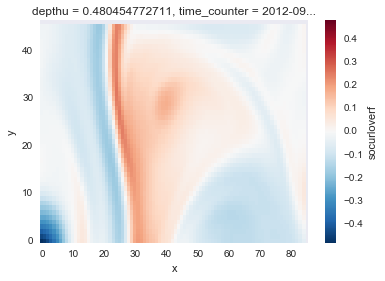

In [6]:
zeta[0,0].plot()
plt.show()

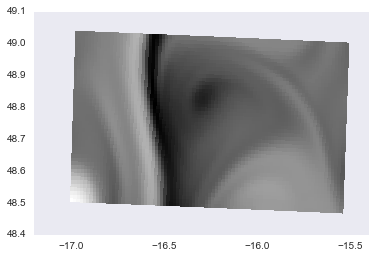

In [7]:
plt.pcolormesh(lons,lats,zeta[0,0])

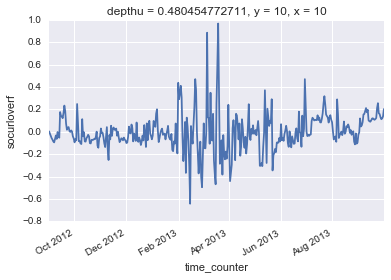

In [8]:
zeta[:,0,10,10].plot()

## 3. Introducing oocgcm

### grid descriptor files
For a large class of computations, we need to know about the grid used for model integration. 
Typically, this information is stored in 4 files.  

In [9]:
glob.glob(datadir + 'NATL60-AJ*.nc')

['/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_byte_mask.nc',
 '/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_coordinates.nc',
 '/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_mesh_hgr.nc',
 '/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_mesh_zgr.nc']

In [10]:
coordfile = glob.glob(datadir + 'NATL60-AJ*coord*.nc')[0]
coordfile

'/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_coordinates.nc'

In [11]:
!ncdump -h '/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_coordinates.nc'

netcdf NATL60-AJ_coordinates {
dimensions:
	y = 47 ;
	x = 86 ;
variables:
	double e1f(y, x) ;
		e1f:missing_value = 1.e+20 ;
	double e1t(y, x) ;
		e1t:missing_value = 1.e+20 ;
	double e1u(y, x) ;
		e1u:missing_value = 1.e+20 ;
	double e1v(y, x) ;
		e1v:missing_value = 1.e+20 ;
	double e2f(y, x) ;
		e2f:missing_value = 1.e+20 ;
	double e2t(y, x) ;
		e2t:missing_value = 1.e+20 ;
	double e2u(y, x) ;
		e2u:missing_value = 1.e+20 ;
	double e2v(y, x) ;
		e2v:missing_value = 1.e+20 ;
	double glamf(y, x) ;
		glamf:missing_value = 1.e+20 ;
	double glamt(y, x) ;
		glamt:missing_value = 1.e+20 ;
	double glamu(y, x) ;
		glamu:missing_value = 1.e+20 ;
	double glamv(y, x) ;
		glamv:missing_value = 1.e+20 ;
	double gphif(y, x) ;
		gphif:missing_value = 1.e+20 ;
	double gphit(y, x) ;
		gphit:missing_value = 1.e+20 ;
	double gphiu(y, x) ;
		gphiu:missing_value = 1.e+20 ;
	double gphiv(y, x) ;
		gphiv:missing_value = 1.e+20 ;
	float nav_lat(y, x) ;
		nav_lat:units = "degrees_north" ;
		nav_lat:valid_min

In [12]:
maskfile = glob.glob(datadir + 'NATL60-AJ*byte*.nc')[0]
maskfile

'/Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_byte_mask.nc'

In [13]:
!ncdump -h /Users/lesommer/data/NATL60/NATL60-CJM165/NATL60-AJ_byte_mask.nc

netcdf NATL60-AJ_byte_mask {
dimensions:
	t = UNLIMITED ; // (1 currently)
	z = 300 ;
	y = 47 ;
	x = 86 ;
variables:
	byte fmask(t, z, y, x) ;
	byte fmaskutil(t, y, x) ;
	float nav_lat(y, x) ;
	float nav_lev(z) ;
	float nav_lon(y, x) ;
	float time_counter(t) ;
	byte tmask(t, z, y, x) ;
	byte tmaskutil(t, y, x) ;
	byte umask(t, z, y, x) ;
	byte umaskutil(t, y, x) ;
	byte vmask(t, z, y, x) ;
	byte vmaskutil(t, y, x) ;

// global attributes:
		:history = "Mon Oct 17 14:17:56 2016: ncks -F -d x,3846,3931 -d y,1652,1698 NATL60_v4.1_cdf_byte_mask.nc NATL60-AJ_byte_mask.nc" ;
		:NCO = "4.4.6" ;
}


### oocgcm grid containers
In what follows, we will see how to access the information contained in grid descriptor files with oocgcm package. You may get information on oocgcm on [github](https://github.com/lesommer/oocgcm) and on [readthedocs](http://oocgcm.readthedocs.io/en/latest/). See in particular the documentation of [grid objects](http://oocgcm.readthedocs.io/en/latest/grids.html).

In [14]:
#import sys; reload(sys)
#sys.setdefaultencoding("utf-8")

In [15]:
from oocgcm.oceanmodels.nemo import grids

In [16]:
grd = grids.nemo_2d_grid(nemo_coordinate_file=coordfile,nemo_byte_mask_file=maskfile)

`grd` contains pointers to the arrays stored in grid descriptor files and  methods (function) that depend on this infomation. 

In [17]:
grd.shape

(1, 47, 86)

In [18]:
dir(grd)

['__contains__',
 '__doc__',
 '__getitem__',
 '__init__',
 '__iter__',
 '__module__',
 '_accepted_arrays',
 '_array_e1t',
 '_array_e1u',
 '_array_e1v',
 '_array_e2t',
 '_array_e2u',
 '_array_e2v',
 '_array_fmask',
 '_array_navlat',
 '_array_navlon',
 '_array_tmask',
 '_array_umask',
 '_array_vmask',
 '_arrays',
 '_coordinate_arrays',
 '_define_aliases_for_arrays',
 '_define_area_of_grid_cells',
 '_define_coriolis_parameter',
 '_define_extra_latitude_longitude',
 '_extra_parameters',
 '_required_arrays',
 '_to_eastern_grid_location',
 '_to_northern_grid_location',
 '_to_southern_grid_location',
 '_to_western_grid_location',
 '_weights_for_change_grid_location',
 'change_grid_location_f_to_u',
 'change_grid_location_f_to_v',
 'change_grid_location_t_to_u',
 'change_grid_location_t_to_v',
 'change_grid_location_u_to_t',
 'change_grid_location_u_to_v',
 'change_grid_location_v_to_t',
 'change_grid_location_v_to_u',
 'chunk',
 'chunks',
 'dims',
 'frontogenesis_function',
 'geostrophic_curr

## 4. Grid dependent calculations with oocgcm grids

### Spatial average (area weighted)

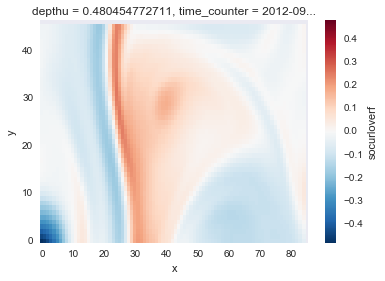

In [19]:
zeta[0,0,...].plot()

we need first to specify what is the location of the variable on the grid, because the grid-dependent operations will need this information. 

In [20]:
zeta.attrs.grid_location='f'

now we can compute the spatial average in the all domain 

In [21]:
a = grd.spatial_average_xy(zeta[0,0,...],grid_location='f')
a.values

/Users/lesommer/anaconda2/lib/python2.7/site-packages/dask/array/core.py:2515: RuntimeWarning: divide by zero encountered in divide
  dt = op(*vals).dtype


array(-0.007347558193214016)

note that this is a weighted averaged, indeed a simple mean would give : 

In [22]:
zeta[0,0,...].mean().values

array(-0.0075155414497975566)

we can perform the computation for all the time straighforwardly : 

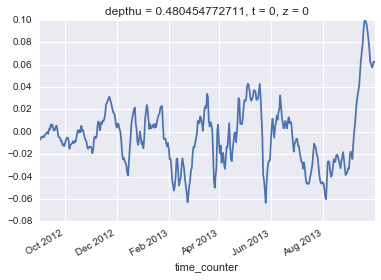

In [23]:
b = grd.spatial_average_xy(zeta[:,0,...],grid_location='f')
b.plot()

### horizontal gradient

In [24]:
g = grd.horizontal_gradient(zeta[0,0,...])

the above line is just a definition. the actual calculation is performed only when the values are requested. note also that `horizontal_gradient` depends on `zeta.grid_location`.

`g` is an oocgcm `VectorField2d`objects 

In [25]:
type(g)

oocgcm.core.grids.VectorField2d

In [26]:
g.x_component

<xarray.DataArray u'd_socurl_dx' (y: 47, x: 86)>
dask.array<div-a02..., shape=(47, 86), dtype=float64, chunksize=(47, 86)>
Coordinates:
    depthu        float32 0.480455
    time_counter  datetime64[ns] 2012-09-01T11:58:56
  * y             (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Attributes:
    savelog10: 0.0
    short_name: d_socurl_dx
    online_operation: N/A
    long_name: x-derivative of Relative_Vorticity (curl)
    valid_min: -1000.0
    grid_location: u
    units: -/m
    iweight: 1
    valid_max: 1000.0
    axis: TYX

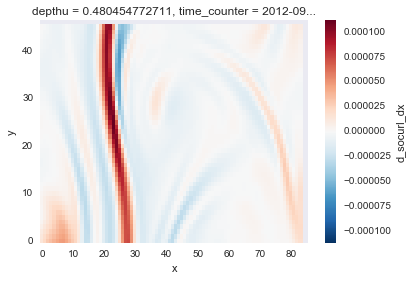

In [27]:
g.x_component.plot()

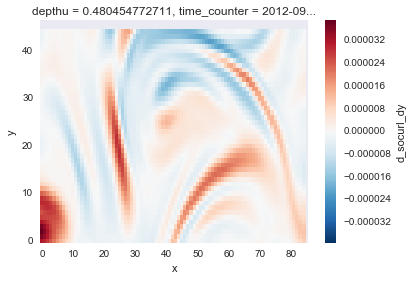

In [28]:
g.y_component.plot()

### norm of a vector field

In [29]:
ng = grd.norm_of_vectorfield(g)

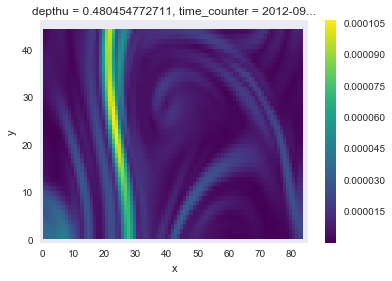

In [30]:
ng.plot()

## Concluding remarks 

oocgcm grid containers store all the information related to the model grid and provide a large number of functions for diagnosing physical quantities from model output.  A list of methods associated with grid containers is available on [oocgcm api description](http://oocgcm.readthedocs.io/en/latest/api.html). 

Note that we have only described here the usage of two-dimensional grid containers and we have note discussed how to perform `out of core` computation with `dask` for large problems. 
